<font size=6px color='indigo' face='Papyrus'>
    <b>Credit Card Approval</b>
</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit_record = pd.read_csv("https://s3.amazonaws.com/sqoop.oozie.ml/credit_record.csv")
application_record = pd.read_csv("https://s3.amazonaws.com/sqoop.oozie.ml/application_record.csv")

In [3]:
pt=pd.pivot_table(data=credit_record,index='ID',columns='STATUS',values='MONTHS_BALANCE',aggfunc='count',fill_value=0)
pt['total_delinquent']=pt.iloc[:,1]+pt.iloc[:,2]+pt.iloc[:,3]+pt.iloc[:,4]+pt.iloc[:,5]
pt['target']=pt['total_delinquent'].apply(lambda x:1 if x!=0 else 0)
pt.head()

STATUS,0,1,2,3,4,5,C,X,total_delinquent,target
ID,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,0,0
5001712,10,0,0,0,0,0,9,0,0,0
5001713,0,0,0,0,0,0,0,22,0,0
5001714,0,0,0,0,0,0,0,15,0,0
5001715,0,0,0,0,0,0,0,60,0,0


In [4]:
pt = pt[['target']]

In [5]:
final = pd.merge(pt,application_record,on='ID')
final.shape

(36457, 19)

In [6]:
final = final.drop('ID',axis=1)

In [7]:
df = final.copy()
df.head()

,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [8]:
X = df.drop('target',axis=1)
y = df['target']
from xverse.transformer import WOE
clf = WOE()
clf.fit(X, y)

WOE(mono_custom_binning={'AMT_INCOME_TOTAL': array([  27000.,  135000.,  202500., 1575000.]),
                         'CNT_CHILDREN': array([ 0.,  1., 19.]),
                         'CNT_FAM_MEMBERS': array([ 1.,  2., 20.]),
                         'DAYS_BIRTH': array([-25152., -18085., -13545.,  -7489.]),
                         'DAYS_EMPLOYED': array([-15713.,  -2512.,   -762., 365243.]),
                         'FLAG_EMAIL': array([0., 1.]),
                         'FLAG_MOBIL': array([1.]),
                         'FLAG_PHONE': array([0., 1.]),
                         'FLAG_...
                                  'Low-skill Laborers': 0.5550706919292876,
                                  'Managers': 0.10884426286411482,
                                  'Medicine staff': 0.15732562042824635,
                                  'NA': -0.11623544902968029,
                                  'Private service staff': -0.6691189041220243,
                                  'Realty agents': 0.0828687764608545,
                                  'Sales staff': -0.05989670302710344,
                                  'Secretaries': -0.3479141396315999,
                                  'Security staff': 0.3086435934960534,
                                  'Waiters/barmen staff': -0.08459594968873815}})

In [9]:
X = clf.transform(X)
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0.090813,-0.042655,-0.062117,-0.016592,0.092374,-0.017516,-0.012749,0.064983,0.191859,0.130236,0.011547,0.0,-0.000857,0.012689,-0.019294,-0.116235,-0.009197
1,0.090813,-0.042655,-0.062117,-0.016592,0.092374,-0.017516,-0.012749,0.064983,0.191859,0.130236,0.011547,0.0,-0.000857,0.012689,-0.019294,-0.116235,-0.009197
2,0.090813,-0.042655,-0.062117,-0.016592,-0.041559,-0.017516,-0.010246,-0.013198,-0.014551,-0.079759,0.031467,0.0,0.000250,0.012689,-0.019294,0.308644,-0.009197
3,-0.047125,0.025439,-0.062117,-0.016592,0.092374,0.088521,-0.010246,0.104669,-0.014551,-0.079759,0.011547,0.0,0.000250,-0.030863,0.181365,-0.059897,-0.009197
4,-0.047125,0.025439,-0.062117,-0.016592,0.092374,0.088521,-0.010246,0.104669,-0.014551,-0.079759,0.011547,0.0,0.000250,-0.030863,0.181365,-0.059897,-0.009197


In [10]:
clf.woe_df.head()

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,CODE_GENDER,F,24430,2758,21672,0.112894,0.887106,0.642741,0.673755,-0.047125,0.004278
1,CODE_GENDER,M,12027,1533,10494,0.127463,0.872537,0.357259,0.326245,0.090813,0.004278
2,FLAG_OWN_CAR,N,22614,2722,19892,0.120368,0.879632,0.634351,0.618417,0.025439,0.001085
3,FLAG_OWN_CAR,Y,13843,1569,12274,0.113342,0.886658,0.365649,0.381583,-0.042655,0.001085
4,FLAG_OWN_REALTY,N,11951,1561,10390,0.130617,0.869383,0.363785,0.323012,0.118873,0.007379


In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from xverse.transformer import WOE

clf = WOE()
clf.fit(X, y)
X = clf.transform(X)

lr = LogisticRegression()
lr.fit(X,y)

print("Training Accuracy:" , lr.score(X,y))
print()
predicted = lr.predict(X)
print("Confusion Matrix:\n", confusion_matrix(y,predicted))
print()
print("Classification Report:\n" , classification_report(y,predicted))
print()
scoresdt = cross_val_score(lr,X,y,cv=10,scoring='f1')
print("Cross_val_Score:" , scoresdt)
print()
print("Average f1_score:" , np.mean(scoresdt))

Training Accuracy: 0.8822996955317223

Confusion Matrix:
 [[32166     0]
 [ 4291     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     32166
           1       0.00      0.00      0.00      4291

    accuracy                           0.88     36457
   macro avg       0.44      0.50      0.47     36457
weighted avg       0.78      0.88      0.83     36457


Cross_val_Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Average f1_score: 0.0


In [ ]:
print(__doc__)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve

param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth",scoring='f1',param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [14]:
rfc = RandomForestClassifier(n_estimators=100,class_weight='balanced')
rfc.fit(X,y)

print("Training Accuracy:" , rfc.score(X,y))
print()
predicted = rfc.predict(X)
print("Confusion Matrix:\n", confusion_matrix(y,predicted))
print()
print("Classification Report:\n" , classification_report(y,predicted))
print()
scoresrfc = cross_val_score(rfc ,X,y,cv=10,scoring='f1')
print("Cross_val_Score:" , scoresrfc)
print()
print("Average f1_score:" , np.mean(scoresrfc))

Training Accuracy: 0.84008558027265

Confusion Matrix:
 [[27182  4984]
 [  846  3445]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90     32166
           1       0.41      0.80      0.54      4291

    accuracy                           0.84     36457
   macro avg       0.69      0.82      0.72     36457
weighted avg       0.90      0.84      0.86     36457


Cross_val_Score: [0.16645963 0.12       0.14407814 0.08540925 0.09362809 0.09622887
 0.10949721 0.13745704 0.09713574 0.06609195]

Average f1_score: 0.11159859275352979


In [15]:
#Model Comparison
from sklearn import model_selection
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(n_estimators=100)
models = []
models.append(('Logistic Regression',lr))
models.append(('Decision Tree Classifier',dt))
models.append(('Random Forest Classifier',rf))
models.append(('Gradient Boosting Classifier',gb))

Logistic Regression: 0.000000 (0.000000)
Decision Tree Classifier: 0.113873 (0.018504)
Random Forest Classifier: 0.028373 (0.019190)
Gradient Boosting Classifier: 0.003301 (0.003192)


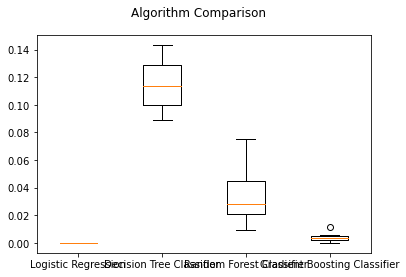

In [16]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold,scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

***

### Making Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from xverse.transformer import WOE
from sklearn.tree import DecisionTreeClassifier

pipe1 = Pipeline([
    ('woe',WOE()),
    ('rfc',DecisionTreeClassifier())
])

In [58]:
pipe1.fit(X,y)

Pipeline(steps=[('woe',
                 WOE(mono_custom_binning={'AMT_INCOME_TOTAL': array([-0.04637093, -0.04155892,  0.09237436]),
                                          'CNT_CHILDREN': array([-0.01659242,  0.13598124]),
                                          'CNT_FAM_MEMBERS': array([-0.00919695,  0.02400246]),
                                          'CODE_GENDER': array([-0.04712514,  0.09081312]),
                                          'DAYS_BIRTH': array([-0.07975887, -0.06089142,  0.13023599]),
                                          'DAYS_EMPLOYED': array([-0.04419908,  0.01...
                               'NAME_INCOME_TYPE': {-0.28819490492997774: -0.28819490492997774,
                                                    -0.1318679456801238: -0.1318679456801238,
                                                    -0.017515560578136035: -0.017515560578136035,
                                                    0.08852078989220076: 0.08852078989220076,
                                                    0.1043667983422789: 0.1043667983422789},
                               'OCCUPATION_TYPE': {-0.11485417609958615: -0.11485417609958615,
                                                   0.009839572551442471: 0.009839572551442471,
                                                   0.14003073752589754: 0.14003073752589754}})),
                ('rfc', DecisionTreeClassifier())])

In [17]:
from sklearn.pipeline import Pipeline
from xverse.transformer import WOE
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('woe',WOE()),
    ('rfc',RandomForestClassifier())
])

In [18]:
pipe.fit(X,y)

Pipeline(steps=[('woe',
                 WOE(mono_custom_binning={'AMT_INCOME_TOTAL': array([-0.04637093, -0.04155892,  0.09237436]),
                                          'CNT_CHILDREN': array([-0.01659242,  0.13598124]),
                                          'CNT_FAM_MEMBERS': array([-0.00919695,  0.02400246]),
                                          'CODE_GENDER': array([-0.04712514,  0.09081312]),
                                          'DAYS_BIRTH': array([-0.07975887, -0.06089142,  0.13023599]),
                                          'DAYS_EMPLOYED': array([-0.04419908,  0.01...
                               'NAME_INCOME_TYPE': {-0.28819490492997774: -0.28819490492997774,
                                                    -0.1318679456801238: -0.1318679456801238,
                                                    -0.017515560578136035: -0.017515560578136035,
                                                    0.08852078989220076: 0.08852078989220076,
                                                    0.1043667983422789: 0.1043667983422789},
                               'OCCUPATION_TYPE': {-0.11485417609958615: -0.11485417609958615,
                                                   0.009839572551442471: 0.009839572551442471,
                                                   0.14003073752589754: 0.14003073752589754}})),
                ('rfc', RandomForestClassifier())])

### Exporting Pipeline

In [ ]:
import pickle

filename = 'credit_card_approval.pkl'
pickle.dump(pipe,open(filename,'wb'))

***

## Delete Cells in this Section

In [59]:
confusion_matrix(y , pipe1.predict(X))

array([[31772,   394],
       [ 2700,  1591]], dtype=int64)

***

### Making the <i>.py</i> File

In [55]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from xverse.transformer import WOE
from sklearn.ensemble import RandomForestClassifier
import pickle
pipe = pickle.load(open('credit_card_approval.pkl' , 'rb'))

st.title('Credit Card Approval App')
st.subheader('By Mayur Shrotriya')

st.sidebar.image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKSiEsPKQAUEEk7kmEy1Rb7YotukM86O286A&usqp=CAU",width=150)
st.sidebar.markdown("[Connect with me on Linkedin!](https://www.linkedin.com/in/mayur-shrotriya-b45133142/)")



c1 , c2, c3 = st.columns(3)


CODE_GENDER = c1.radio('Gender:', ['Male', 'Female'])
CODE_GENDER = 'M' if CODE_GENDER == 'Male' else 'F'

FLAG_OWN_CAR = c2.radio('Own a car?:', ['Yes', 'No'])
FLAG_OWN_CAR = 0 if FLAG_OWN_CAR == 'No' else 1

FLAG_OWN_REALTY = c3.radio('Own a property?:', ['Yes', 'No'])
FLAG_OWN_REALTY = 0 if FLAG_OWN_REALTY == 'No' else 1


c1 , c2 = st.columns(2)
CNT_CHILDREN = c1.number_input('Count of Children :',min_value = 0, max_value = 20)
CNT_FAM_MEMBERS = c2.number_input('Count of Family Members :',min_value = 0, max_value = 20)

AMT_INCOME_TOTAL = c1.number_input('Total Income :')
NAME_INCOME_TYPE = c2.selectbox('Income Type',['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Student'])

NAME_EDUCATION_TYPE = c1.selectbox('Education Type :',['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'])
NAME_FAMILY_STATUS = c2.selectbox('Family Status', ['Civil marriage', 'Married', 'Single / not married', 'Separated', 'Widow'])

NAME_HOUSING_TYPE = c1.selectbox('House Type :',['Rented apartment', 'House / apartment', 'Municipal apartment', 'With parents', 'Co-op apartment', 'Office apartment'])
AGE = c2.number_input('Age (In Years)',max_value = 100)
DAYS_BIRTH = - AGE * 365 

WORK_YEARS = c1.number_input('Work Years',max_value = 70)
DAYS_EMPLOYED = - WORK_YEARS / 365
OCCUPATION_TYPE = c2.selectbox('Occupation Type', ['NA', 'Security staff', 'Sales staff', 'Accountants', 'Laborers', 'Managers', 'Drivers', 'Core staff', 'High skill tech staff', 'Cleaning staff', 'Private service staff', 'Cooking staff', 'Low-skill Laborers', 'Medicine staff', 'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'])

FLAG_MOBIL = c1.radio('Own a Mobile?',['Yes','No'])
FLAG_MOBIL = 0 if FLAG_MOBIL == 'No' else 1

FLAG_WORK_PHONE = c2.radio('Own a Work Phone?',['Yes','No'])
FLAG_WORK_PHONE = 0 if FLAG_WORK_PHONE == 'No' else 1

FLAG_PHONE = c1.radio('Own a Phone?',['Yes','No'])
FLAG_PHONE = 0 if FLAG_PHONE == 'No' else 1

FLAG_EMAIL = c2.radio('Own a Email?',['Yes','No'])
FLAG_EMAIL = 0 if FLAG_EMAIL == 'No' else 1



inp = pd.DataFrame([[CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS]],columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 
               'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 
               'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'])
st.write(inp)

pred = pipe.predict(inp)

if pred == 1:
    out = 'Your Credit Card is Approved!'
else:
    out = 'Your Credit Card is Not Approved!'
    
if st.button('Predict Approval for Credit Card'):
    st.success(out)

Overwriting app.py
